In [87]:
import sys
sys.path.append('../')

import os
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R

DATA_PATH = "/dust3r/masked_dust3r/data/jackal_drive"

with open(os.path.join(DATA_PATH, "transforms.json"), "r") as f:
    transforms = json.load(f)

In [88]:
#Sort transforms["frames"] lexographically by transforms[frames][i]["file_path"]
transforms["frames"] = sorted(transforms["frames"], key=lambda x: x["file_path"])

[[  25.44883861  -21.55302948  -55.93532143]
 [  25.44289579  -21.55767367  -84.0755116 ]
 [  25.44889523  -21.55499736 -109.05186109]
 [  25.44876341  -21.55320073  -60.76406942]
 [  25.4534979   -21.56072557 -141.79451836]
 [  25.45081408  -21.55902717   45.81568596]
 [  25.44828949  -21.55728994  -23.58856331]
 [  25.45160125  -21.55818383  -49.0454498 ]
 [  25.44970649  -21.5578826     2.88620799]
 [  25.44825029  -21.56056481    2.12878613]
 [  25.45030899  -21.55835452   -4.65801127]
 [  25.44837552  -21.5597456     1.45245435]
 [  25.44311153  -21.56199705  -89.75036895]
 [  25.44871278  -21.55399673   -4.19100212]
 [  25.4487975   -21.55493706  -99.51902888]
 [  25.44731078  -21.56368953  -96.47540613]
 [  25.44878995  -21.55390447  -58.44230786]
 [  25.44296136  -21.56381906 -102.7804382 ]
 [  25.44869881  -21.55335707 -101.98145698]
 [  25.44336374  -21.55336223 -108.79626274]
 [  25.44316141  -21.55547059 -114.68176941]
 [  25.44455916  -21.55472889 -120.43461048]
 [  25.443

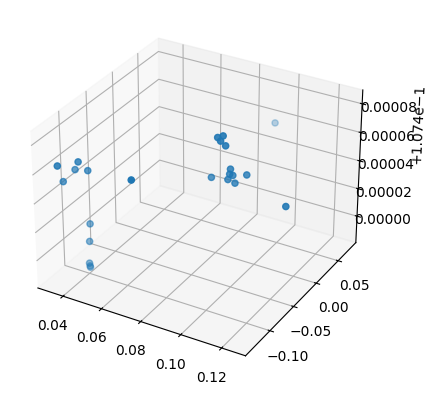

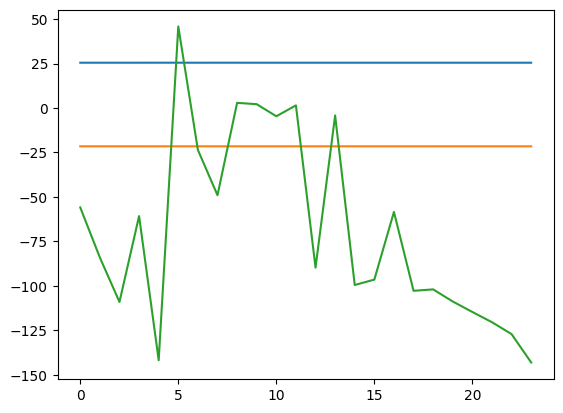

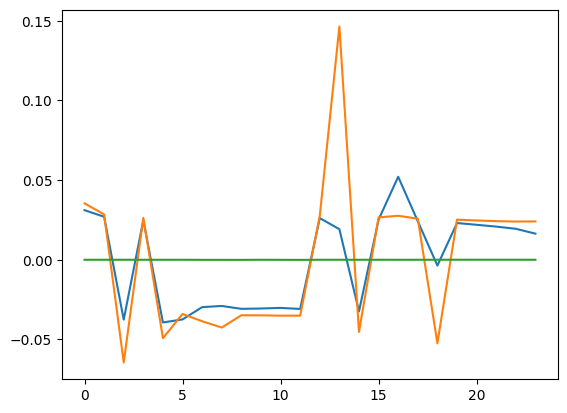

In [89]:
#transforms["frames"] = rotate_best_fit_plane(transforms["frames"])

points = []
euler_angle = []
for frame in transforms["frames"]:
    tf = frame["transform_matrix"]
    tf = np.array(tf).reshape(4, 4)
    points.append(tf[0:3, 3])
    r = R.from_matrix(tf[0:3, 0:3])
    euler_angle.append(r.as_euler('xyz', degrees=True))

points = np.array(points)
euler_angle = np.array(euler_angle)
print(euler_angle)

# Plot the points

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# Plot the euler angles with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(euler_angle[:, 0], label="x")
ax.plot(euler_angle[:, 1], label="y")
ax.plot(euler_angle[:, 2], label="z")

# Plot the points with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(points[:, 0] - points[:,0].sum()/len(points[:,0]), label="x")
ax.plot(points[:, 1] - points[:,1].sum()/len(points[:,1]), label="y")
ax.plot(points[:, 2] - points[:,2].sum()/len(points[:,2]), label="z")

plt.show()

[[ 4.49771869e+01  0.00000000e+00  7.20099863e+00]
 [ 4.49771869e+01  0.00000000e+00  1.27098159e+01]
 [ 4.49771869e+01  0.00000000e+00  1.62196148e+01]
 [ 4.49771869e+01  1.27222187e-14  2.32814207e+01]
 [ 4.49771869e+01  1.27222187e-14  2.95632093e+01]
 [ 4.49771869e+01  0.00000000e+00  3.62403840e+01]
 [ 4.49771869e+01  1.27222187e-14  4.11964609e+01]
 [ 4.49771869e+01  0.00000000e+00  4.59038136e+01]
 [ 4.49771869e+01  0.00000000e+00  5.09350131e+01]
 [ 4.49771869e+01  0.00000000e+00  5.56281952e+01]
 [ 4.49771869e+01  0.00000000e+00  6.08285758e+01]
 [ 4.49771869e+01  1.27222187e-14  6.73237624e+01]
 [ 4.49771869e+01  0.00000000e+00  7.15962420e+01]
 [ 4.49771869e+01  0.00000000e+00  7.87423162e+01]
 [ 4.49771869e+01  0.00000000e+00  8.58544386e+01]
 [ 4.49771869e+01  1.27222187e-14  9.11327127e+01]
 [ 4.49771869e+01  1.27222187e-14  9.73857202e+01]
 [ 4.49771869e+01  0.00000000e+00  1.02302081e+02]
 [ 4.49771869e+01  1.27222187e-14  1.09471255e+02]
 [ 4.49771869e+01  0.00000000e+

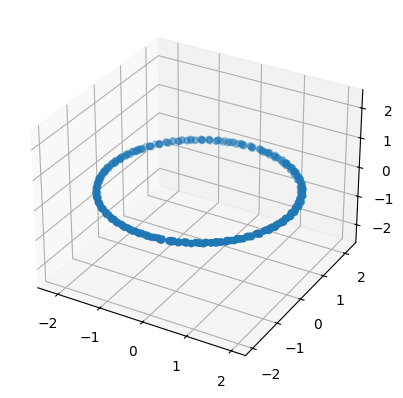

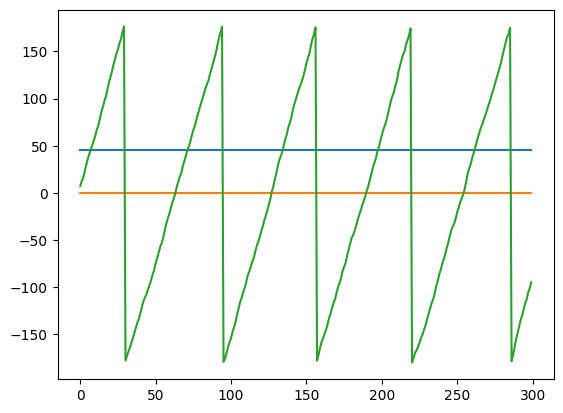

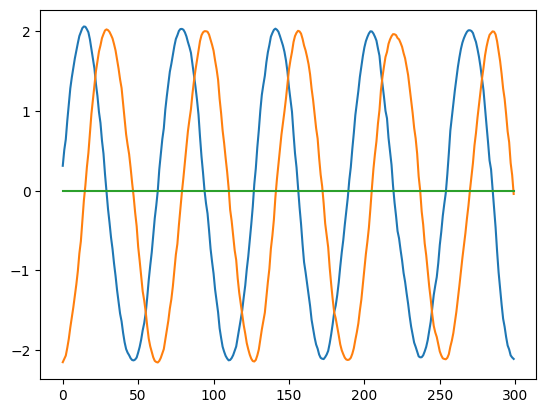

In [90]:
with open(os.path.join(DATA_PATH, "ground_truth.json"), "r") as f:
    ground_truth = json.load(f)
    
#transforms["frames"] = rotate_best_fit_plane(transforms["frames"])

points = []
euler_angle = []
for frame in ground_truth["frames"]:
    tf = frame["transform_matrix"]
    tf = np.array(tf).reshape(4, 4)
    points.append(tf[0:3, 3])
    r = R.from_matrix(tf[0:3, 0:3])
    euler_angle.append(r.as_euler('xyz', degrees=True))

points = np.array(points)
euler_angle = np.array(euler_angle)
print(euler_angle)

# Plot the points

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(points[:, 0], points[:, 1], points[:, 2])

# Plot the euler angles with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(euler_angle[:, 0], label="x")
ax.plot(euler_angle[:, 1], label="y")
ax.plot(euler_angle[:, 2], label="z")

# Plot the points with respect to index
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(points[:, 0] - points[:,0].sum()/len(points[:,0]), label="x")
ax.plot(points[:, 1] - points[:,1].sum()/len(points[:,1]), label="y")
ax.plot(points[:, 2] - points[:,2].sum()/len(points[:,2]), label="z")

plt.show()